**NumPy syntax**

Complex number
1j

Load data 
io.loadmat('data.mat')

dimensionality
numel(a)  |  np.size(a)
size(a)   |  np.shape(a)
size(a,n) |  a.shape[n-1]

In [2]:
import numpy as np
from scipy import io, integrate, linalg, signal
from scipy.sparse.linalg import cg, eigs

In [9]:
# for loops
for i in range(1,4):
    print(i)

# matlab equivalent 
# for i = 1:3 
# end

blabla


'\nfor i in range(1,4):\n    print(i)\n'

In [23]:
# matrix dimensionality
a = np.array([[1,2,3],[4,5,6]])
a.T # a'
np.size(a) # numel()
np.shape(a) # size()
a.shape[0] # size(a,n-1)
a[-1] # a(end)
a[0,2] # a(1,3)
a[1,:] # a(2,:)
a[:5,:] # a(1:5,:)
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [25]:
# matrix math
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[1,2],[3,4],[5,6]])
a @ b # a*b 
a * b # a.*b
a**2  # a.^2

array([[22, 28],
       [49, 64]])

In [101]:
# find idx 
a = np.array([[1,2,3],[4,5,6]])
print(a)
indices = np.where(a > 2) # find()
row_idx, col_idx = indices
np.array([row_idx,col_idx]).T

# zero out
a * (a > 2) # zero out entries that are <= 2

# assign y = x
y = a.copy()
z = a[1,:].copy()

# flatten (array -> vector)
y = a.flatten() # y = x(:)

# create a column vector of cont' integers 
np.arange(1,11)[:, np.newaxis] # [1,10]'
np.arange(1,11).reshape(-1,1)

# zero matrix
np.zeros((3,4))

# identity matrix
np.eye(3)

# returns diag elements of a matrix
np.diag(a)
np.diag(y,0) 

# rng
from numpy.random import default_rng
rng = default_rng(42) # seed = 42
rng.random((3,4))

# linspace
np.linspace(1,3,4)

# meshgrid
x, y = np.mgrid[0:9,0:6]

# concatenate cols
np.hstack(a,b)

# concatenate rows
np.vstack(a,b)

# max
a.max
a.max(0) # max of each col
a.max(1) # max of each row

# inverse
linalg.inv(a)
linalg.pinv(a) # pseudo-inverse

# svd
U,S,Vh = linalg.svd(a); V = Vh.T
       

[[1 2 3]
 [4 5 6]]


[array([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.]]),
 array([[0., 1., 2., 3., 4., 5.]])]

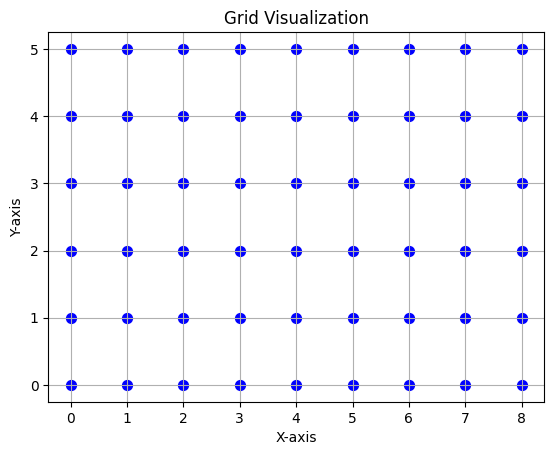

In [98]:
# visualize 
import numpy as np
import matplotlib.pyplot as plt

# Create the grid using np.mgrid
x, y = np.mgrid[0:9, 0:6]

# Plot the grid points
plt.scatter(x, y, c='blue', marker='o', s=50)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Grid Visualization')
plt.grid(True)

# Show the plot
plt.show()

MT practice question:

# Inner product with a unit vector
Given a unit N-dimensional vector \(\hat{u}\), and an arbitrary N-dimensional vector \(\vec{v}\), write the following (MATLAB or Python) functions:

- A function named `projection` that returns a vector that is the component of \(\vec{v}\) lying along the direction \(\hat{u}\).
- A function named `ortho` that returns a vector that is the component of \(\vec{v}\) that is orthogonal (perpendicular) to \(\hat{u}\), and
- A function named `distance` that returns the distance from \(\vec{v}\) to the component that lies along direction \(\hat{u}\).

Verify that your code is working by testing it on random vectors \(\hat{u}\) and \(\vec{v}\) (generate these using `randn` in MATLAB or `np.random.randn` in Python). Remember to re-scale \(\hat{u}\) so that it has unit length. First, do this visually with 2-dimensional vectors, by plotting \(\hat{u}\), \(\vec{v}\), and the two components described in (a) and (b). (hint: execute `axis equal` in MATLAB or `plt.axis('equal')` in Python to ensure that the horizontal and vertical axes have the same units). Then test it numerically in higher dimensions (e.g., 4) by writing expressions to verify each of the following, and executing them on a few randomly drawn vectors \(\vec{v}\):

- The vector in (a) points in the same (or opposite) direction as \(\hat{u}\).
- The vector in (a) is orthogonal to the vector in (b).
- The sum of the vectors in (a) and (b) is equal to \(\vec{v}\).
- The sum of squared lengths of the vectors in (a) and (b) is equal to \(\|\vec{v}\|^2\).

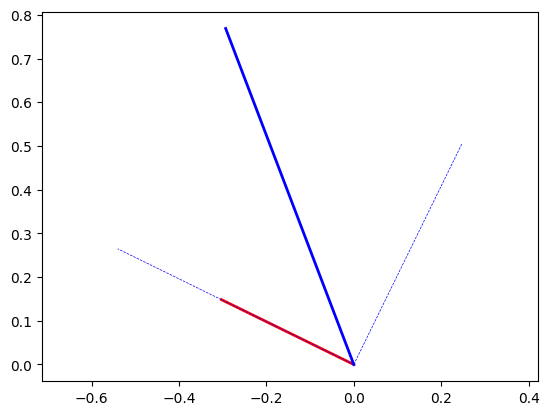

In [129]:
def unit(u):
    return u/np.sqrt(np.sum(u**2))
    
def projection(u,v):
    u = unit(u)
    return np.dot(u,v)*u

def ortho(u,v):
    u = unit(u)
    return v - np.dot(u,v)*u

def distance(u,v):
    u = unit(u)
    ortho = v - np.dot(u,v)*u
    return np.sqrt(np.sum(ortho**2))

# testing 2d
u = np.random.randn(2)
v = np.random.randn(2)
proj_v = projection(u,v)
ortho_v = ortho(u,v)
plt.figure()
plt.plot([0, u[0]], [0, u[1]], 'r', linewidth = 2.0)  
plt.plot([0, v[0]], [0, v[1]], 'b', linewidth = 2.0) 
plt.plot([0, proj_v[0]], [0, proj_v[1]], '--b', linewidth = 0.5) 
plt.plot([0, ortho_v[0]], [0, ortho_v[1]], '--b', linewidth = 0.5) 
plt.xlim(-5, 5)  # Set appropriate limits for x-axis
plt.ylim(-5, 5)  # Set appropriate limits for y-axis
plt.axis('equal')
plt.show()

In [141]:
# testing high-d
u2 = np.random.randn(4)
v2 = np.random.randn(4)
#1)
proj_v2 = projection(u2,v2)
print(unit(u2))
print(unit(proj_v2)) 
# they have the same unit vectors or unit vectors with opposite signs
# so they are pointing in the same direction or opposite directions

[ 0.57985193  0.37407437 -0.41045856 -0.59612404]
[-0.57985193 -0.37407437  0.41045856  0.59612404]
-2.220446049250313e-16
[-1.66172095 -0.9121927   2.21287047 -1.77187529]
[-1.66172095 -0.9121927   2.21287047 -1.77187529]
11.629749779888327
11.629749779888327


In [ ]:
#2)
ortho_v2 = ortho(u2,v2)
print(np.dot(ortho_v2, proj_v2))
# dot product = 0, therefore orthogonal 

In [ ]:
#3)
print(v2)
print(ortho_v2 + proj_v2)
# yuppp equal

In [ ]:
#4)
def length(a):
    return np.sqrt(sum(a**2))
print(length(v2)**2)
sum_sq_len = length(proj_v2)**2 + length(ortho_v2)**2
print(sum_sq_len)